# Machine Learning with Python - regression models

## Simple Linear Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [73]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [11]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB','CO2EMISSIONS']].copy()

In [13]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


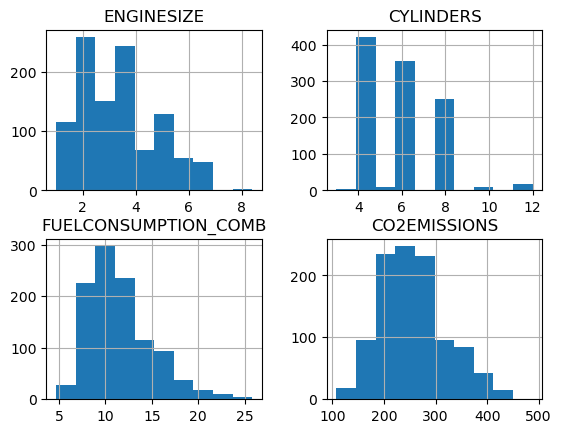

In [15]:
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

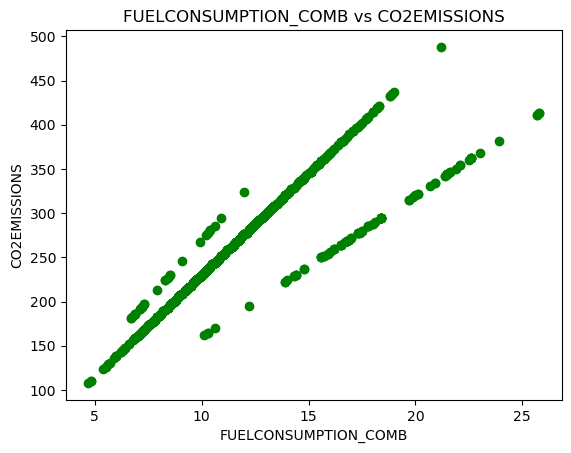

In [17]:
plt.scatter(cdf['FUELCONSUMPTION_COMB'],cdf['CO2EMISSIONS'], color='green')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.title('FUELCONSUMPTION_COMB vs CO2EMISSIONS')
plt.show()

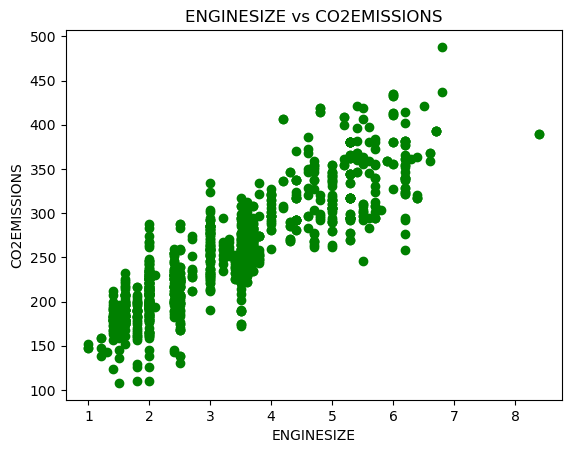

In [19]:
plt.scatter(cdf['ENGINESIZE'],cdf['CO2EMISSIONS'], color='green')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('ENGINESIZE vs CO2EMISSIONS')
plt.show()

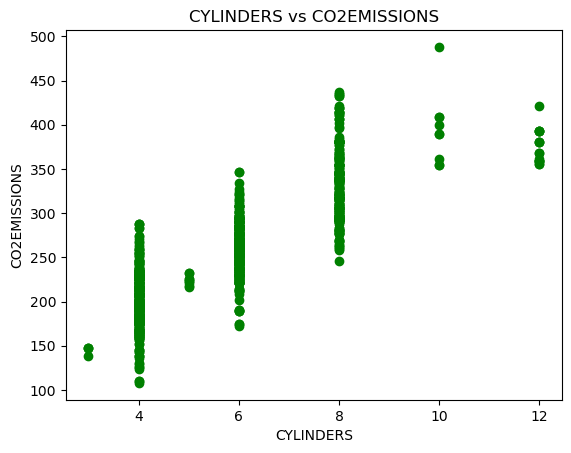

In [21]:
plt.scatter(cdf['CYLINDERS'],cdf['CO2EMISSIONS'], color='green')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.title('CYLINDERS vs CO2EMISSIONS')
plt.show()

In [23]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']],cdf['CO2EMISSIONS'],test_size=0.2,random_state=42)

In [29]:
x_train.shape

(853, 3)

In [31]:
y_train.shape

(853,)

In [33]:
x_test.shape

(214, 3)

In [35]:
y_test.shape

(214,)

In [37]:
train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
2,1.5,4,5.9,136
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232


In [39]:
train.shape

(851, 4)

In [41]:
test.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1,2.4,4,9.6,221
3,3.5,6,11.1,255
8,3.7,6,11.6,267
14,4.7,8,14.7,338
16,4.7,8,14.7,338


In [43]:
test.shape

(216, 4)

In [45]:
from sklearn.linear_model import LinearRegression

In [47]:
regr = LinearRegression()

In [49]:
train_x = np.asanyarray(train['ENGINESIZE']).reshape(-1,1)
train_y = np.asanyarray(train['CO2EMISSIONS']).reshape(-1,1)

In [51]:
regr.fit(train_x,train_y)

LinearRegression()

In [53]:
print('Coeff: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coeff:  [[39.47313595]]
Intercept:  [124.12755954]


Y_cap = 124.09 + (39.54 * X)

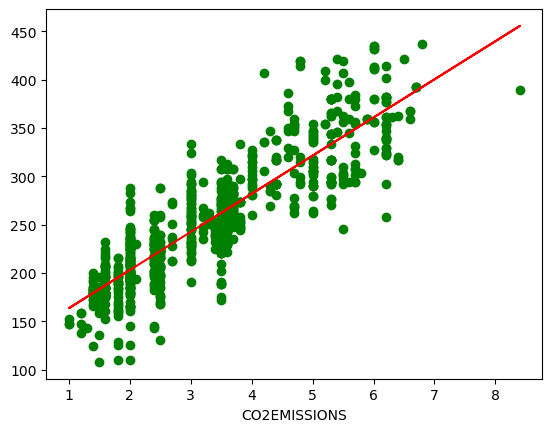

In [55]:
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'], color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.xlabel('ENGINESIZE')
plt.xlabel('CO2EMISSIONS')
plt.show()

In [57]:
from sklearn.metrics import r2_score

In [59]:
test_x = np.asanyarray(test['ENGINESIZE']).reshape(-1,1)
test_y = np.asanyarray(test['CO2EMISSIONS']).reshape(-1,1)

In [61]:
y_cap = regr.predict(test_x)

In [63]:
print('Mean Absolute Error (MAE): %.2f' % np.mean(np.absolute(y_cap-test_y)))

Mean Absolute Error (MAE): 24.17


In [65]:
print('Residual Sum of Square : %.2f' % np.mean((y_cap-test_y)**2))

Residual Sum of Square : 1016.35


In [67]:
print('R2 score: %.2f' % r2_score(test_y,y_cap))

R2 score: 0.73


## Multipla Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression

In [72]:
regr = LinearRegression()

In [74]:
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train['CO2EMISSIONS']).reshape(-1,1)

In [76]:
regr.fit(train_x,train_y)

LinearRegression()

In [78]:
print('Coeff: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coeff:  [[12.12159971  6.55183342  9.66820092]]
Intercept:  [65.83839346]


Y_cap = 65.38 + (10.58 * ENGINESIZE) + (7.85 * CYLINDERS) + (9.47 * FUELCONSUMPTION_COMB)

In [81]:
from sklearn.metrics import r2_score

In [83]:
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test['CO2EMISSIONS']).reshape(-1,1)

In [85]:
y_cap_multi = regr.predict(test_x)

In [87]:
print('Mean Square Error: %.2f' % np.mean((y_cap_multi - test_y)**2))

Mean Square Error: 552.65


In [89]:
print("R2 Score: %.2f" % r2_score(test_y,y_cap_multi))

R2 Score: 0.85


In [91]:
print("Variance Score: %.2f" % regr.score(test_x,test_y))

Variance Score: 0.85


# Non-Linear / Polynomial Regression

In [94]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

train_x = np.asanyarray(train[['ENGINESIZE']]).reshape(-1,1)
train_y = np.asanyarray(train['CO2EMISSIONS']).reshape(-1,1)

test_x = np.asanyarray(test[['ENGINESIZE']]).reshape(-1,1)
test_y = np.asanyarray(test['CO2EMISSIONS']).reshape(-1,1)

In [96]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly[0:5]

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25]])

In [98]:
train_x.shape

(851, 1)

In [100]:
train_x_poly.shape

(851, 3)

In [102]:
train_y.shape

(851, 1)

In [104]:
test_x.shape

(216, 1)

In [106]:
test_y.shape

(216, 1)

In [108]:
clf = LinearRegression()
regr = clf.fit(train_x_poly,train_y)

In [112]:
print('Coeff: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coeff:  [[ 0.         49.94870151 -1.40040012]]
Intercept:  [107.61257924]


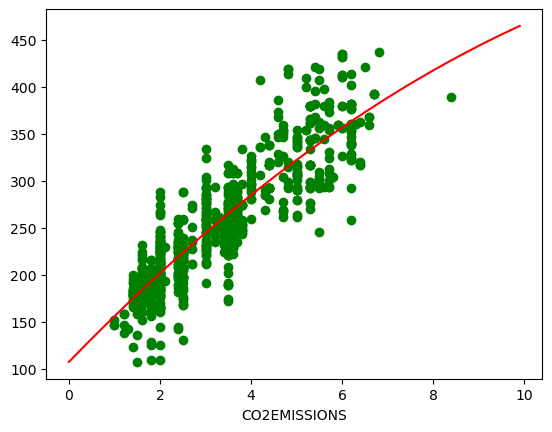

In [114]:
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'], color='green')
xx = np.arange(0.0,10.0,0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*xx + clf.coef_[0][2]*np.power(xx,2)
plt.plot(xx,yy,'-r')
plt.xlabel('ENGINESIZE')
plt.xlabel('CO2EMISSIONS')
plt.show()

In [116]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
y_cap_poly = clf.predict(test_x_poly)

In [118]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(y_cap_poly - test_y)))

Mean Absolute Error: 24.20


In [120]:
print("Residual sum of squares: %.2f" % np.mean((y_cap_poly - test_y)**2))

Residual sum of squares: 1000.77


In [122]:
print('R2 Score: %.2f' % r2_score(test_y,y_cap_poly))

R2 Score: 0.73


In [124]:
import pickle

In [140]:
file = open('regr_poly','wb')
pickle.dump(regr,file)
file.close()

In [142]:
file = open('regr_poly','rb')
data = pickle.load(file)
file.close()